<a href="https://colab.research.google.com/github/Dhanalaxmi3103/Data_Science_Workshop/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving hmnist_28_28_L.csv.zip to hmnist_28_28_L.csv (1).zip


In [ ]:
data=pd.read_csv("hmnist_28_28_L.csv.zip")
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,101,110,154,160,95,44,139,184,164,160,...,103,73,72,75,152,130,96,133,159,2
1,67,66,69,76,80,57,46,67,90,77,...,58,65,74,80,81,83,77,75,73,2
2,127,137,121,140,170,111,128,117,60,105,...,90,100,143,119,148,140,193,146,97,2
3,80,90,101,106,120,100,99,66,63,91,...,131,109,97,102,71,93,120,84,62,2
4,153,141,121,132,110,131,119,99,101,91,...,117,121,136,178,192,210,189,149,155,2


In [ ]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, pixel0000 to label
dtypes: int64(785)
memory usage: 29.9 MB


In [ ]:
#cheking for null values
data.isnull().sum()

,0
pixel0000,0
pixel0001,0
pixel0002,0
pixel0003,0
pixel0004,0
...,...
pixel0780,0
pixel0781,0
pixel0782,0
pixel0783,0


# **Random Forest on Whole Dataset**

**Spliiting dataset into independent and dependent variables**

In [ ]:
X=data.drop("label",axis=1)
Y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=35)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for_class=RandomForestClassifier()
ran_for_class.fit(x_train,y_train)

RandomForestClassifier()

**Prediction**

In [ ]:
y_pred=ran_for_class.predict(x_test)
y_pred

array([4, 8, 8, ..., 4, 4, 7])

In [ ]:
y_predicted=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
y_predicted.head()

,Actual values,Predicted values
3808,4,4
3078,8,8
3120,8,8
2457,6,6
3885,4,4


In [ ]:
y_pred_proba=ran_for_class.predict_proba(x_test)
y_pred_proba

array([[0.26, 0.02, 0.07, ..., 0.13, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.21, 0.79],
       ...,
       [0.29, 0.01, 0.08, ..., 0.09, 0.  , 0.  ],
       [0.23, 0.  , 0.02, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.9 , 0.07]])

**Evaluating the model**

In [ ]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6896


In [ ]:
confu=metrics.confusion_matrix(y_test,y_pred)
print(confu)

[[ 96   1  16  17   0   3   0   0]
 [  3  78  29   0  36   4   1   0]
 [ 28  34  77   7   9   5   0   0]
 [ 28   5  25  93   0   6   0   0]
 [  5  38  15   0  96   3   6   0]
 [ 18   2  12   6  16 115   0   0]
 [  0   0   0   0   2   0 156   5]
 [  0   0   0   0   0   0   3 151]]


<Axes: >

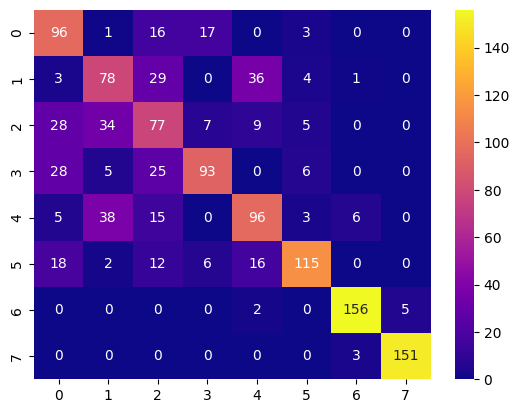

In [ ]:
sns.heatmap(confu,annot=True,cmap='plasma',fmt='d')

In [ ]:
class_report=metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.54      0.72      0.62       133
           2       0.49      0.52      0.50       151
           3       0.44      0.48      0.46       160
           4       0.76      0.59      0.66       157
           5       0.60      0.59      0.60       163
           6       0.85      0.68      0.75       169
           7       0.94      0.96      0.95       163
           8       0.97      0.98      0.97       154

    accuracy                           0.69      1250
   macro avg       0.70      0.69      0.69      1250
weighted avg       0.70      0.69      0.69      1250



# **PCA**

**standardizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_X=scale.fit_transform(X)

**Applying PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca_X=pca.fit_transform(scaled_X)

**Explnained Variance Ratio**

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Total explained variance: {np.sum(explained_variance)}")

Explained variance ratio: [0.7485653  0.01239187 0.01101287 0.0073217  0.00703058 0.00655068
 0.00447851 0.00426444 0.00416334 0.00403519 0.00342307 0.00314328
 0.00303199 0.00287155 0.00275088 0.00258426 0.00253172 0.00245721
 0.0023103  0.00217072 0.00212425 0.00202318 0.00196195 0.00194929
 0.00192136 0.0018412  0.00177052 0.00173498 0.00171429 0.00165024
 0.00161544 0.00160296 0.00147663 0.00146781 0.00141936 0.00139391
 0.00137249 0.00135018 0.00132321 0.0012716  0.00123333 0.0012201
 0.00119242 0.00117494 0.00116593 0.0011268  0.00112351 0.00110338
 0.00109145 0.00107824]
Total explained variance: 0.8815844268530476


**Visualizing The Explained VAriance Ratio**

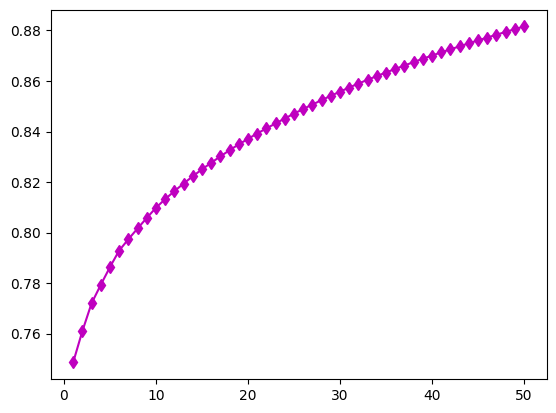

In [ ]:
cum_var=np.cumsum(explained_variance)
plt.plot(range(1,len(cum_var)+1),cum_var,marker='d',color='m')
plt.show()

In [ ]:
print("Reduced Columns:\n",pca.components_)

Reduced Columns:
 [[ 0.03517442  0.03543143  0.03561765 ...  0.03520457  0.03539343
   0.03533899]
 [ 0.01258496  0.01491489  0.0192132  ... -0.02359321 -0.01748908
  -0.0137596 ]
 [ 0.02909651  0.03015298  0.02986849 ... -0.04235477 -0.03926259
  -0.03749042]
 ...
 [-0.02000576 -0.00945824  0.002449   ... -0.00710805 -0.02564857
  -0.03396184]
 [ 0.02129012  0.03111987  0.0416088  ...  0.05440286  0.02444867
   0.0171691 ]
 [-0.03013701 -0.05310054 -0.06176325 ... -0.01853279 -0.02591568
  -0.03212497]]
Reduced Dataset shape:
 (5000, 50)


In [ ]:
print("Reduced Dataset shape:\n",pca_X.shape)

Reduced Dataset shape:
 (5000, 50)


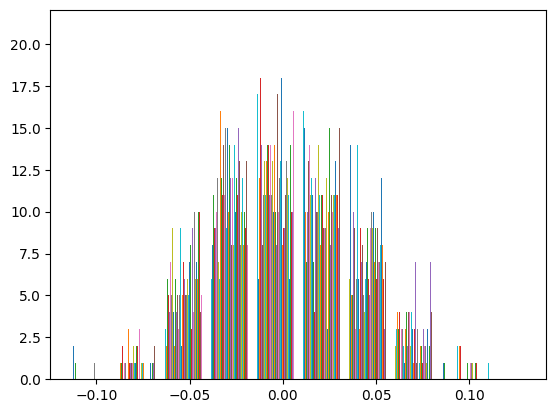

In [ ]:
#Visualize pca components
componentsPCA=pca.components_
plt.hist(componentsPCA)
plt.show()

# **Random Forest Classifier on Reduced Dataset**

In [ ]:
#Setting Independent variables and dependent variables
X=pca_X
Y=data['label']

In [ ]:
#Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=35)

In [ ]:
#Model Fitting
ranForest_Reduced=RandomForestClassifier()
ranForest_Reduced.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#Predicting
Y_pred=ranForest_Reduced.predict(X_test)
Y_predict=pd.DataFrame({"Actual Values":Y_test,"Predicted values":Y_pred})
Y_predict.head()

,Actual Values,Predicted values
3808,4,1
3078,8,8
3120,8,8
2457,6,6
3885,4,1


In [ ]:
Y_pred_proba=ranForest_Reduced.predict_proba(X_test)
Y_pred_proba

array([[0.22, 0.07, 0.1 , ..., 0.22, 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.05, 0.95],
       ...,
       [0.36, 0.07, 0.2 , ..., 0.06, 0.04, 0.  ],
       [0.21, 0.08, 0.1 , ..., 0.01, 0.01, 0.  ],
       [0.  , 0.03, 0.06, ..., 0.  , 0.73, 0.11]])

**Evaluating the mmodel**

In [ ]:
accu=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy of Reduced Dataset:\n",accu)

Accuracy of Reduced Dataset:
 0.6392


In [ ]:
confusion=metrics.confusion_matrix(Y_test,Y_pred)
print(confusion)

[[ 72   1   7  31   0  22   0   0]
 [  3  71  27   7  31  12   0   0]
 [ 17  38  58  22   9  16   0   0]
 [ 35  11  23  80   0   8   0   0]
 [  4  23  14   5  83  29   5   0]
 [ 16   2   7   0  18 126   0   0]
 [  0   0   0   0   2   0 157   4]
 [  0   0   0   0   0   0   2 152]]


<Axes: >

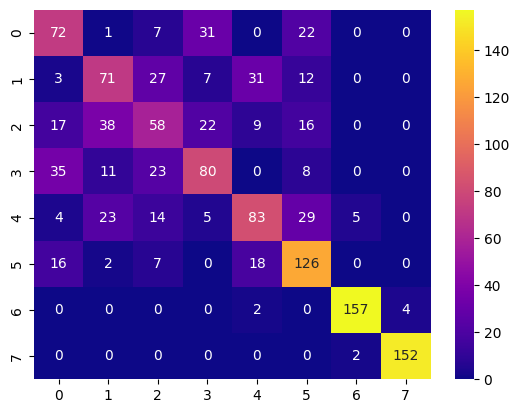

In [ ]:
sns.heatmap(confusion,annot=True,fmt='d',cmap='plasma')

In [ ]:
report=metrics.classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.49      0.54      0.51       133
           2       0.49      0.47      0.48       151
           3       0.43      0.36      0.39       160
           4       0.55      0.51      0.53       157
           5       0.58      0.51      0.54       163
           6       0.59      0.75      0.66       169
           7       0.96      0.96      0.96       163
           8       0.97      0.99      0.98       154

    accuracy                           0.64      1250
   macro avg       0.63      0.64      0.63      1250
weighted avg       0.64      0.64      0.64      1250



# **Comparing Results of Model on whole Dataset and Model on Reduced Dataset**

In [ ]:
#Accuracy
print("Accuracy of Whole Dataset:\n",accuracy)
print("Accuracy of Reduced Dataset:\n",accu)

Accuracy of Whole Dataset:
 0.6896
Accuracy of Reduced Dataset:
 0.6392


In [ ]:
#Precision
print("Precision of Whole Dataset:\n",metrics.precision_score(y_test,y_pred,average='weighted'))
print("Precision of Reduced Dataset:\n",metrics.precision_score(Y_test,Y_pred,average='weighted'))


Precision of Whole Dataset:
 0.70348070976835
Precision of Reduced Dataset:
 0.635283628269928
